# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros.
-Aplique três métodos de clustering distintos nas duas bases acima.
-Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import *
from sklearn import preprocessing
import math
import seaborn as sns
import warnings
from IPython.display import Image
import pyclustering as pycls

from labelMatch import *
%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Dados

Tem-se como objetivo classificar uma determinada silhueta como um dos quatro tipos de veículo, utilizando um conjunto de características extraídas da silhueta. O veículo pode ser visto de um dos muitos ângulos diferentes.

 As características foram extraídas das silhuetas pela extensão BINATTS do HIPS (Hierarchical Image Processing System), que extrai uma combinação de características independentes de escala utilizando medidas baseadas em momentos clássicos como variância escalonada, assimetria e curtose sobre os eixos maior / menor e heurística. medidas como ocos, circularidade, retangularidade e compacidade. Quatro veículos modelo "Corgie" foram usados ​​para o experimento: um ônibus de dois andares, Cheverolet van, Saab 9000 e um Opel Manta 400. Esta combinação particular de veículos foi escolhida com a expectativa de que o ônibus, a van e qualquer um dos carros ser facilmente distinguível, mas seria mais difícil distinguir entre os carros. As imagens foram adquiridas por uma câmera olhando para baixo no modelo do veículo a partir de um ângulo fixo de elevação (34,2 graus para a horizontal). Os veículos foram colocados em uma superfície difusa com luz de fundo (lightbox). Os veículos foram pintados de preto fosco para minimizar os destaques. As imagens foram capturadas usando um framestore CRS4000 conectado a um vax 750. Todas as imagens foram capturadas com uma resolução espacial de 128x128 pixels quantificados para 64 greylevels. Estas imagens foram limitadas para produzir silhuetas de veículos binários, negadas (para cumprir os requisitos de processamento de BINATTS) e depois submetidas a módulos HIPS de contração-expansão-expansão-contração para remover "sal e pimenta" ruído de imagem. Os veículos foram rodados e o seu ângulo de orientação foi medido usando uma gratícula radial por baixo do veículo. 0 e 180 graus corresponderam às vistas "head on" e "rear" respectivamente, enquanto 90 e 270 corresponderam aos perfis em direções opostas. Dois conjuntos de 60 imagens, cada conjunto cobrindo uma rotação total de 360 ​​graus, foram capturados para cada veículo. O veículo foi rodado por um ângulo fixo entre as imagens. Esses conjuntos de dados são conhecidos como e2 e e3, respectivamente. Outros dois conjuntos de imagens, e4 e e5, foram capturados com a câmera em elevações de 37,5 graus e 30,8 graus, respectivamente. Esses conjuntos também contêm 60 imagens por veículo além de e4.

## 1.1 Informações sobre os dados:

#### Atributos:
- COMPACTNESS     (average perim)**2/area
     
- CIRCULARITY     (average radius)**2/area
     
- DISTANCE CIRCULARITY    area/(av.distance from border)**2
     
- RADIUS RATIO    (max.rad-min.rad)/av.radius
     
- PR.AXIS ASPECT RATIO    (minor axis)/(major axis)
     
- MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)
     
- SCATTER RATIO   (inertia about minor axis)/(inertia about major axis)
     
- ELONGATEDNESS area/(shrink width)**2
     
- PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)
     
- MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)
     
- SCALED VARIANCE ALONG MAJOR AXIS (2nd order moment about minor axis)/area
     
- SCALED VARIANCE ALONG MINOR AXIS (2nd order moment about major axis)/area
 
- SCALED RADIUS OF GYRATION (mavar+mivar)/area
     
- SKEWNESS ABOUT MAJOR AXIS (3rd order moment about major axis)/sigma_min**3
     
- SKEWNESS ABOUT MINOR AXIS (3rd order moment about minor axis)/sigma_maj**3
             
- KURTOSIS ABOUT MINOR AXIS (4th order moment about major axis)/sigma_min**4
       
             
- KURTOSIS ABOUT MAJOR AXIS (4th order moment about minor axis)/sigma_maj**4

- HOLLOWS RATIO   (area of hollows)/(area of bounding polygon)


## 1.2 Carregamento e avaliação inicial

In [2]:
data = pd.read_csv('dataset_54_vehicle.csv')

In [3]:
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
data_x = data.drop(columns=['Class'])
data_y = data.Class

# 2. Pré-processamento

### 2.1 Verificando elementos vazios

Como é possivel visualizar a base de dados não contem dados faltantes, logo avança para a análise estatistica 

In [5]:
data.isna().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

### 2.4 Análise estatística

#### 2.4.1 Correlação

Por correlação é possivel observar que há atributos com alta correlação como COMPACTNESS e SCATTER_RATIO, que por sua vez tem alta correlação com DISTANCE_CIRCULARITY e assim por diante

In [6]:
data.corr()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
COMPACTNESS,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
CIRCULARITY,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
DISTANCE_CIRCULARITY,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
RADIUS_RATIO,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
PR.AXIS_ASPECT_RATIO,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381
MAX.LENGTH_ASPECT_RATIO,0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919
SCATTER_RATIO,0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950
ELONGATEDNESS,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
PR.AXIS_RECTANGULARITY,0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
MAX.LENGTH_RECTANGULARITY,0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


### 2.5 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [7]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data_x)

In [8]:
data_scaler

array([[ 0.16058035,  0.5089502 ,  0.05781852, ...,  0.38099086,
        -0.31372213,  0.18395733],
       [-0.32546965, -0.62626753,  0.1212614 , ...,  0.15692533,
         0.0109371 ,  0.45297703],
       [ 1.25419283,  0.83329812,  1.51700488, ..., -0.4032385 ,
        -0.15139252,  0.04944748],
       ...,
       [ 1.49721783,  1.48199396,  1.19979045, ..., -0.96340232,
        -0.31372213,  0.72199673],
       [-0.93303214, -1.43713733, -0.25939591, ...,  1.38928574,
         0.17326672, -0.08506238],
       [-1.05454464, -1.43713733, -1.02071053, ...,  0.60505639,
        -0.47605175, -0.75761164]])

In [9]:
data_scaled = pd.DataFrame(data_scaler, columns=['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO'])
data_scaled.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


### 2.8 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há diversos outliers. Adiante os atributos com outliers serão removidos para aplicar os algoritmos pela 2ª vez.

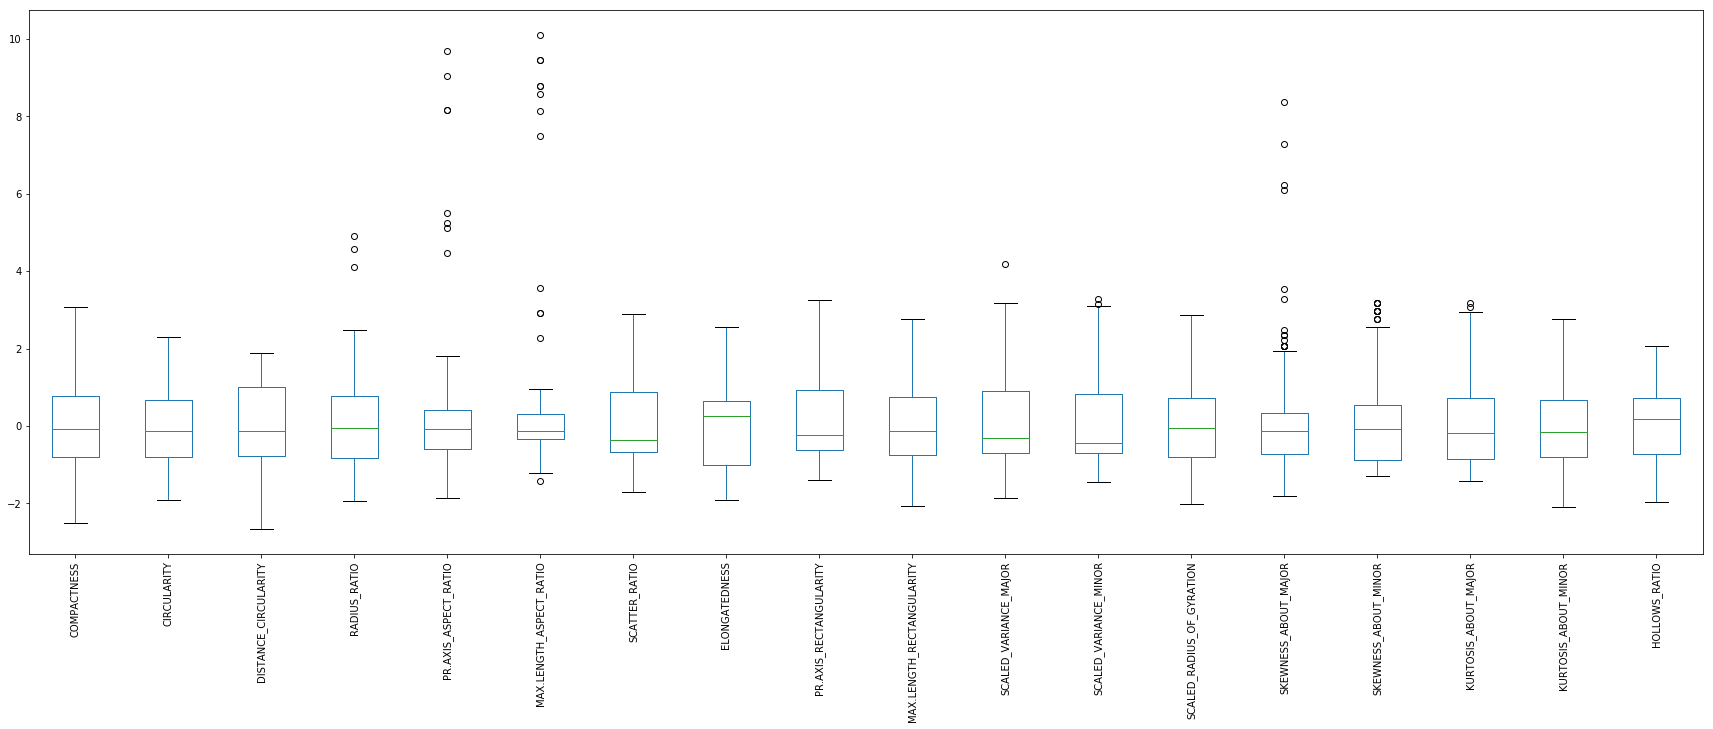

In [10]:
data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [76]:
data_kmeans = data_scaled.copy()

In [77]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

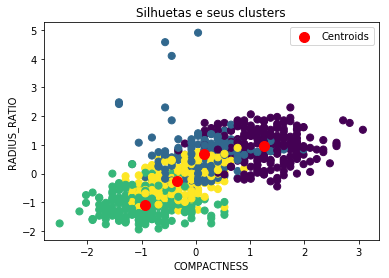

In [78]:
plt.scatter(data_scaler[:,0], data_scaler[:,3], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.1.2 Agglomerative Clustering

In [79]:
data_agglo = data_scaled.copy()

In [80]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo.fit(data_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x7fbd9418ce18>)

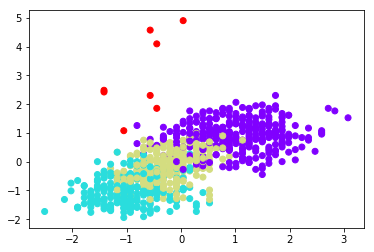

In [81]:
plt.scatter(data_scaler[:,0],data_scaler[:,3], c=agglo.labels_, cmap='rainbow')  

### 3.1.3 Spectral Clustering

In [82]:
data_spectral = data_scaled.copy()

In [83]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit(data_spectral)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=4, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

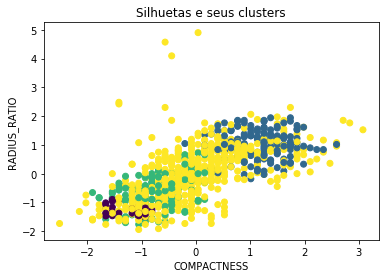

In [84]:
plt.scatter(data_scaler[:,0], data_scaler[:,3], c = spectral.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

## 3.2 Dataset com atributos selecionados

In [85]:
data_reduzida = data_scaled.drop(columns=['RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO','SKEWNESS_ABOUT_MAJOR','SKEWNESS_ABOUT_MINOR'])
data_reduzida.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,0.160580,0.508950,0.057819,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,-0.179173,-1.450029,-1.699181


In [86]:
data_scaler2 = data_reduzida.values

### 3.2.1 K-Means

In [87]:
data_kmeans2 = data_reduzida.copy()

In [88]:
kmeans2 = KMeans(n_clusters = 4, init = 'random')
kmeans2.fit(data_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

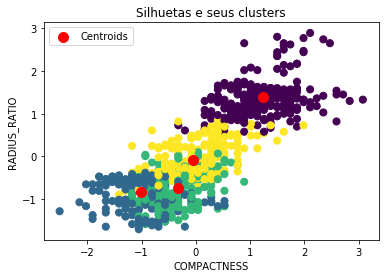

In [89]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], s = 50, c = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 3], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.2.2 Agglomerative Clustering

In [90]:
data_agglo2 = data_reduzida.copy()

In [91]:
agglo2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo2.fit(data_agglo2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x7fbd9418ce18>)

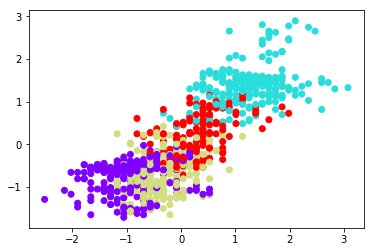

In [92]:
plt.scatter(data_scaler2[:,0],data_scaler2[:,3], c=agglo2.labels_, cmap='rainbow')  

### 3.2.3

In [93]:
data_spectral2 = data_reduzida.copy()

In [94]:
spectral2 = SpectralClustering(n_clusters=4)
spectral2.fit(data_spectral2)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=4, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

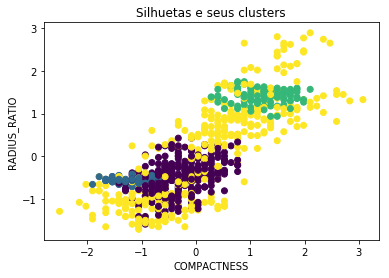

In [95]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], c = spectral2.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

# 4. Avaliação

In [96]:
lista = []

for i in range(len(data_y)):
    if data_y[i] == 'van':
        lista.append(0)
    elif data_y[i] == 'saab':
        lista.append(1)
    elif data_y[i] == 'bus':
        lista.append(2)
    elif data_y[i] == 'opel':
        lista.append(3)
        
lista = np.array(lista)

### 4.1.1 KMeans - Completo

In [97]:
dataset = data_x.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_x)
data.ndim = len(data_x.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans.cluster_centers_, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
# hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
# silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
# print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
# print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[  0   0 199   0]
 [  0   0 217   0]
 [  0   0 218   0]
 [  0   0 212   0]]

Adjusted-Rand Score:  0.0

Adjusted Mutual Info Score:  -6.493187075936187e-16

F1 Score:  0.10244360902255638

Accuracy Score:  0.2576832151300236


### 4.1.2 KMeans - Selecionado

In [98]:
dataset = data_reduzida.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_reduzida)
data.ndim = len(data_reduzida.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans2.cluster_centers_, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 85  66  48   0]
 [ 49  36  37  95]
 [ 40  42  95  41]
 [ 45  30  37 100]]

Calinski-Harabaz Score:  611.9063475554191

Adjusted-Rand Score:  0.07857058284911228

Adjusted Mutual Info Score:  0.09908734617243321

F1 Score:  0.36851299193091724

Accuracy Score:  0.3735224586288416

Silhouette Score:  0.2977457069658925


### 4.2.1 Agglomerative Clustering - Completo

In [99]:
def centroide(data):
    array2 = []
    for valor in range(0,4):
        df_aux = data.loc[data.Label == valor]
        array = []
        for coluna in df_aux:
            array.append(df_aux[coluna].mean())

        array2.append(array)

    return np.array(array2)

In [100]:
data_agglo['Label'] = agglo.labels_
data_agglo.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Label
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957,1
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977,2
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447,0
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056,2
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181,3


In [101]:
centroide_hieraquico = centroide(data_agglo)

In [102]:
dataset = data_x.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_x)
data.ndim = len(data_x.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[  6 193   0   0]
 [  0 217   0   0]
 [  2 216   0   0]
 [  0 212   0   0]]

Calinski-Harabaz Score:  6.6954821811908145

Adjusted-Rand Score:  0.000620545354973709

Adjusted Mutual Info Score:  0.004435759331159843

F1 Score:  0.11733635551892299

Accuracy Score:  0.2635933806146572

Silhouette Score:  0.07049261504620488


### 4.2.2  Agglomerative Clustering - Selecionado

In [103]:
data_agglo2['Label'] = agglo2.labels_
data_agglo2.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Label
0,0.160580,0.508950,0.057819,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,0.380991,-0.313722,0.183957,0
1,-0.325470,-0.626268,0.121261,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,0.156925,0.010937,0.452977,2
2,1.254193,0.833298,1.517005,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,-0.403238,-0.151393,0.049447,1
3,-0.082445,-0.626268,-0.005624,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-0.291206,1.634233,1.529056,2
4,-1.054545,-0.139746,-0.766939,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,-0.179173,-1.450029,-1.699181,0


In [104]:
centroide_hieraquico2 = centroide(data_agglo2)

In [105]:
dataset = data_reduzida.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_reduzida)
data.ndim = len(data_reduzida.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico2, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 81  23  95   0]
 [ 39  51  42  85]
 [ 44  37 100  37]
 [ 35  46  40  91]]

Calinski-Harabaz Score:  598.7672607312468

Adjusted-Rand Score:  0.07376854262549516

Adjusted Mutual Info Score:  0.0961261997631054

F1 Score:  0.3780095366911802

Accuracy Score:  0.3817966903073286

Silhouette Score:  0.285865318146313


### 4.3.1 Spectral Clustering - Completo

In [106]:
data_spectral['Label'] = spectral.labels_
data_spectral.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Label
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957,3
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977,2
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447,1
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056,3
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181,3


In [107]:
centroide_spectral = centroide(data_spectral)

In [108]:
dataset = data_x.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_x)
data.ndim = len(data_x.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
# hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
# silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
# print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
# print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[  0   0 199   0]
 [  0   0 217   0]
 [  0   0 218   0]
 [  0   0 212   0]]

Adjusted-Rand Score:  0.0

Adjusted Mutual Info Score:  -6.493187075936187e-16

F1 Score:  0.10244360902255638

Accuracy Score:  0.2576832151300236


### 4.3.2  Spectral Clustering - Selecionado

In [109]:
data_spectral2['Label'] = spectral2.labels_
data_spectral2.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Label
0,0.160580,0.508950,0.057819,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,0.380991,-0.313722,0.183957,0
1,-0.325470,-0.626268,0.121261,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,0.156925,0.010937,0.452977,0
2,1.254193,0.833298,1.517005,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,-0.403238,-0.151393,0.049447,2
3,-0.082445,-0.626268,-0.005624,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-0.291206,1.634233,1.529056,0
4,-1.054545,-0.139746,-0.766939,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,-0.179173,-1.450029,-1.699181,3


In [110]:
centroide_spectral2 = centroide(data_spectral2)

In [111]:
dataset = data_reduzida.values

class Data:
    namostras = 0 
    ndim = 0
    ncluster = 0

data = Data()

data.namostras = len(data_reduzida)
data.ndim = len(data_reduzida.columns)
data.ncluster = 4


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral2, 4, dataset, data)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,data.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING 
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)             
arit = adjusted_rand_score(labels_true, labels_predict)             
amit = adjusted_mutual_info_score(labels_true, labels_predict)                  
f1t = f1_score(labels_true, labels_predict, average='macro')         
accurracyt =accuracy_score(labels_true, labels_predict)               
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)            
print('\nAdjusted-Rand Score: ',arit)         
print('\nAdjusted Mutual Info Score: ',amit)                 
print('\nF1 Score: ',f1t)       
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[109  39  51   0]
 [ 54  36  33  94]
 [ 69  21  88  40]
 [ 46  39  29  98]]

Calinski-Harabaz Score:  573.9000753337515

Adjusted-Rand Score:  0.07918183438270905

Adjusted Mutual Info Score:  0.09992393305046202

F1 Score:  0.38076442237010977

Accuracy Score:  0.3912529550827423

Silhouette Score:  0.2698466878567752
